In [1]:
## Loading Libraries
#####################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv('train.csv')
df_train.shape

(550068, 12)

In [3]:
df_test=pd.read_csv('test.csv')
df_test.shape

(233599, 11)

In [4]:
## Merging two data from train and test
df=df_train.append(df_test)

In [5]:
df.shape

(783667, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
## finding null columns and counts
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [8]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [9]:
Product_Category_2=df['Product_Category_2'].mode()[0]

In [10]:
df['Product_Category_2']=df['Product_Category_2'].fillna(Product_Category_2)

In [11]:
df['Product_Category_2'].isnull().sum()

0

In [12]:
Product_Category_3=df['Product_Category_3'].mode()[0]

In [13]:
df['Product_Category_3']=df['Product_Category_3'].fillna(Product_Category_2)

In [14]:
df['Product_Category_3'].isnull().sum()

0

In [15]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [16]:
df.drop(['User_ID'],axis=1,inplace=True)

In [17]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,8.0,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,8.0,8.0,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,8.0,1057.0
4,P00285442,M,55+,16,C,4+,0,8,8.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,F,26-35,15,B,4+,1,8,8.0,8.0,NaN
233595,P00254642,F,26-35,15,B,4+,1,5,8.0,8.0,NaN
233596,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,F,46-50,1,C,4+,0,10,16.0,8.0,NaN


In [18]:
df['Gender']=df['Gender'].map({'M':1,'F':0})

In [19]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [21]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [22]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [23]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [24]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,8.0,8.0,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,8.0,8.0,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,8.0,1057.0
4,P00285442,1,7,16,C,4,0,8,8.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4,1,8,8.0,8.0,NaN
233595,P00254642,0,3,15,B,4,1,5,8.0,8.0,NaN
233596,P00031842,0,3,15,B,4,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4,0,10,16.0,8.0,NaN


In [25]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [26]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,8.0,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,8.0,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,8.0,1057.0,0,0
4,P00285442,1,7,16,C,4,0,8,8.0,8.0,7969.0,0,1


In [27]:
df.drop(['City_Category'],axis=1,inplace=True)

In [28]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,8.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,8.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,8.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,8.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,8.0,NaN,1,0
233595,P00254642,0,3,15,4,1,5,8.0,8.0,NaN,1,0
233596,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4,0,10,16.0,8.0,NaN,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [30]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [52]:
# newdata=df.drop(['Product_ID','Purchase'],axis=1)

In [32]:
# sns.pairplot(newdata)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

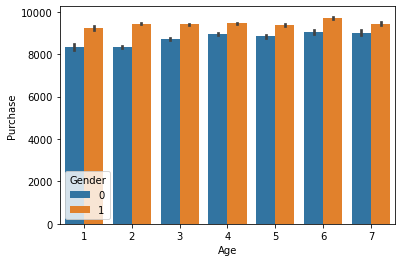

In [34]:
## Bar Plot verses Age vs Purchase and label Gender
###################################################
sns.barplot('Age','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

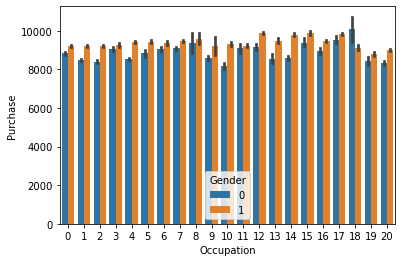

In [35]:
## Visualization and Occupation vs Purchase
#################################################
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

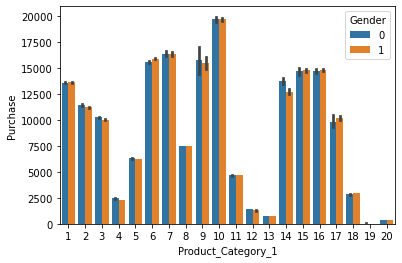

In [36]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

In [38]:
## Feature Selection 
#######################
df_test=df[df['Purchase'].isnull()]
df_test

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,8.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,8.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,8.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,8.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,8.0,NaN,1,0
233595,P00254642,0,3,15,4,1,5,8.0,8.0,NaN,1,0
233596,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4,0,10,16.0,8.0,NaN,0,1


In [39]:
df_train=df[~df['Purchase'].isnull()]
df_train

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,8.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,8.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,8.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,8.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,8.0,368.0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,8.0,371.0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,8.0,137.0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,8.0,365.0,0,1


In [40]:
X=df_train.drop(['Purchase'],axis=1)

In [41]:
X

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,8.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,8.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,8.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,8.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,8.0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,8.0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,8.0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,8.0,0,1


In [44]:
y=df_train['Purchase']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [47]:
x_train.drop('Product_ID',axis=1,inplace=True)
x_test.drop('Product_ID',axis=1,inplace=True)

In [48]:
## Feature Scaling
###################
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [49]:
ss.fit_transform(x_train)

array([[ 0.57141282, -1.10505734,  0.90867822, ..., -0.45226372,
         1.17569512, -0.67282374],
       [ 0.57141282,  1.84716932, -1.23820419, ..., -0.45226372,
        -0.85056064, -0.67282374],
       [ 0.57141282,  0.37105599,  1.36872445, ...,  0.82976572,
        -0.85056064,  1.48627336],
       ...,
       [-1.75004823, -1.10505734, -1.08485545, ..., -0.45226372,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.62480922, ..., -0.45226372,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.93150671, ..., -0.45226372,
        -0.85056064, -0.67282374]])

In [50]:
ss.transform(x_test)

array([[ 0.57141282,  1.84716932,  1.67542193, ...,  2.11179516,
        -0.85056064,  1.48627336],
       [-1.75004823,  0.37105599,  0.44863199, ...,  2.11179516,
         1.17569512, -0.67282374],
       [-1.75004823,  0.37105599, -1.23820419, ..., -0.45226372,
        -0.85056064, -0.67282374],
       ...,
       [ 0.57141282, -1.10505734, -0.93150671, ..., -0.45226372,
        -0.85056064,  1.48627336],
       [ 0.57141282,  0.37105599, -0.16476299, ...,  1.7912878 ,
        -0.85056064,  1.48627336],
       [ 0.57141282, -1.10505734, -0.62480922, ..., -0.45226372,
         1.17569512, -0.67282374]])